Data Source: The dataset can be found here. 
Download Link- https://drive.usercontent.google.com/download?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&export=download


Step 1: Data cleaning including missing values, outliers and multi-collinearity. 

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Fraud.csv')

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
# Example: Fill missing values with mean for numerical columns
df.fillna(df.mean(), inplace=True)

# Example: Drop rows with missing values if necessary
df.dropna(inplace=True)

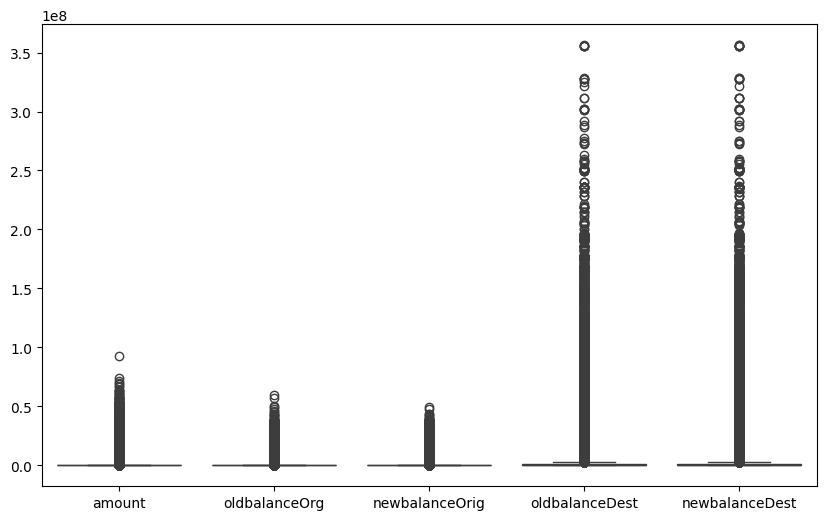

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('Fraud.csv')
# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.show()

# Example: Remove outliers based on a threshold
from scipy import stats

df = df[(np.abs(stats.zscore(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])) < 3).all(axis=1)]

In [3]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('Fraud.csv')
# Calculate the correlation matrix
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

# Calculate VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         Variable         VIF
0          amount    3.861988
1   oldbalanceOrg  464.011728
2  newbalanceOrig  465.356124
3  oldbalanceDest   70.452251
4  newbalanceDest   82.167173


Step 2: Fraud Detection Model

In [4]:
# Convert categorical variables to numerical if necessary
df['type'] = df['type'].astype('category').cat.codes

# Create additional features if needed
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1906297      54]
 [    460    1975]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.81      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.91      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



Step 3: Variable Selection

In [7]:
# Get feature importance from the model
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

          Feature  Importance
8  balance_change    0.327478
6  newbalanceDest    0.253088
2          amount    0.118819
3   oldbalanceOrg    0.105855
0            step    0.082431
5  oldbalanceDest    0.051448
1            type    0.033120
4  newbalanceOrig    0.027246
7  isFlaggedFraud    0.000517


Step 4: Model Performance

ROC AUC: 0.905529984659933


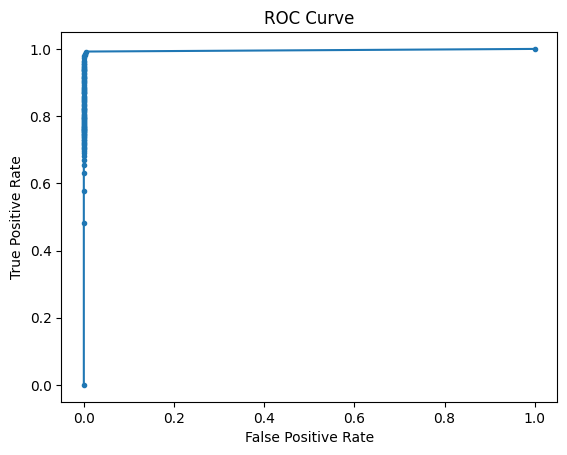

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
